# DATA SCHOOL LESSONS 1-How do I read a tabular data file into pandas?

import pandas as pd  ----> Pandas kütüphanesini import ediyoruz


user_columns = ["user_id", "age", "gender", "occupation", "zip_code"] -----> Aşağıdaki link ile bir DataFrame oluşturacağız ve bu DataFrame in columnlarına istediğimiz isimleri vermek için columns isimlerini bir liste halinde yazıyoruz.


pd.read_table("http://bit.ly/movieusers", sep = "|", header = None, names = user_columns)-----> DataFrame imizi okutmanın en pratik yolu. Bu kodun içine linkte atılabilir diğer dosya uzantıları da atılabilir. İçerisindeki bazı parametreler kullanılarak DataFrame in düzgün görünmesi sağlanmış oluyor. sep ile columnlar düzenleniyor, örneğin csv dosyaalrı virgül ile ayrıldığı için sep = "," diyoruz. Bunun yerine csv dosyaları için read_csv("filename") kullanabiliriz. Çünkü bu defaultunda seperator olarak virgül kullanıyor zaten. Header ı None yaparak halihazırda dosyanın ilk satırının sütun isimleri olarak getirilmesi engellenmiş oluyor. names ise column isimlerinin ne olmasını istiyorsak bunun için var. Sütunlara istediğimiz isimleri bir liste formatında verebiliyoruz. 

# DATA SCHOOL LESSONS 2-How do I select a pandas Series from a DataFrame?

Series dediğimiz sadece 1 sütun ve o sütuna ait satırlardan oluşan dataları içermektedir.
DataFrame ise bir çok Series tan oluşur. Yani bir DataFrame in içindeki veriler aslında Series koleksiyonu olarak bellekte depolanır.

In [10]:
#import pandas as pd
import pandas as pd

In [11]:
ufo = pd.read_csv("http://bit.ly/uforeports")

In [14]:
type(ufo) #Linkten içeriye aktardığımız bu dosya bir çok Series ten oluşan bir DataFrame olduğu için
          #dosyanın type ını DataFrame olarak gördük.

pandas.core.frame.DataFrame

In [15]:
ufo.head() #DataFrame in baştan, default olarak ilk 5 satırını getiriyoruz.

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [16]:
ufo["City"] #Python case sensitivedir(Büyük-küçük harfe duyarlı). Column ismi nasıl yazılmışsa aynen o şekilde yazıyoruz. 
#Bu yazım şekli ufo DataFrame indeki City ismindeki Series i bana getir demektir. 

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
18236              Grant Park
18237             Spirit Lake
18238             Eagle River
18239             Eagle River
18240                    Ybor
Name: City, Length: 18241, dtype: object

In [17]:
type(ufo["City"]) #ufo["City"] DataFrame in bir parçası olsada kendi başına bir Series dir

pandas.core.series.Series

ufo.City yazarakta bu column u getirebiliriz. Fakat bu her zaman kullanışlı olmaz. Çünkü attributelar, "DataFrame.attribute" formatında yazıldığından, column isimleriyle attribute isimlerinde benzerlik olduğu takdirde bize o column u getirmek yerine attribute u uygulayacaktır. Kolay bir yol olsada bracket(köşeli parantez) tercih edilmesi daha uygundur.

In [21]:
ufo["City"] + "," + ufo["State"] #Series lar aynen stringlerde olduğu gibi toplama işlemi ile birleştirilebilirler.
#Ve bu şekilde bir bileştirmeden sonra biz bunları yeni bir Series e dönüştürmüş olduk.

0                      Ithaca,NY
1                 Willingboro,NJ
2                     Holyoke,CO
3                     Abilene,KS
4        New York Worlds Fair,NY
                  ...           
18236              Grant Park,IL
18237             Spirit Lake,IA
18238             Eagle River,WI
18239             Eagle River,WI
18240                    Ybor,FL
Length: 18241, dtype: object

In [23]:
ufo["Location"] = ufo["City"] + "," + ufo["State"] 
#Bu Series ı DataFrame imizin bir sütunu haline getirmek için bu kodu yazıyoruz.
ufo["Location"]

0                      Ithaca,NY
1                 Willingboro,NJ
2                     Holyoke,CO
3                     Abilene,KS
4        New York Worlds Fair,NY
                  ...           
18236              Grant Park,IL
18237             Spirit Lake,IA
18238             Eagle River,WI
18239             Eagle River,WI
18240                    Ybor,FL
Name: Location, Length: 18241, dtype: object

In [24]:
ufo.head() #Oluşturduğumuz Location sütununu aşağıda görebiliyoruz.

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca,NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro,NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke,CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene,KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair,NY"


# DATA SCHOOL LESSONS 3-Why do some pandas commands end with parentheses (and others don't)?

In [25]:
#import pandas as pd
movies = pd.read_csv("http://bit.ly/imdbratings")

In [26]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [28]:
movies.describe() #Sadece sayısal değerlere sahip olan sütunların belli başlı matematiksel verilerini getiriyor.

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [29]:
movies.shape #Movies DataFrame inin toplam satır ve sütun sayısını gösteren bir tuple veriyor. (columns, rows)

(979, 6)

In [30]:
movies.dtypes#Her bir sütunun data type ının ne olduğunu ayrıntılı olarak gösteriyor. DataFrame in type ı ise objecttir.
# Karışık türlere sahip sütunlar, object dtype ile saklanır

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

Yukarıda bazı kodlar yazdık ve bazıları için parantez kullanırken bazıları için parantez kullanmadık.
Python da fonksiyon, metot ve attribute kavramlarını görmüştük. Fonksiyon ve metodlarda parantez kullanıyoruz; Attribute larda parantez kullanmıyoruz. Fonksiyon ve metodlar action based oldukları için içlerine bazı parametreler almak durumundalar, bu sebeple parantezlere ihtiyaç duyuyoruz fakat attributelar sadece describe etmek için var. Bir DataFrame e bir attribute uyguladığımızda aslında o an var olan bir özelliği ortaya çıkarmış oluyoruz. Şöyle bir örnek verebilirz: 
Bir insanı bir object olarak düşünecek olursak, 
Daniel.talk(), Daniel.eat() ---> Bunlar Danielin yapabildiği fiillerdir ve hızlı konuşma parametresi eklenebilir.
Daniel.age, Daniel.height ---> Bunlar ise Danielin var olan özellikleridir. Herhangi bir parametreye ihtiyaç yoktur.

DataFrame. deyip tab tab yaptığımızda karşımıza bir liste çıktığını görüyoruz. Bu liste, o DataFrame e uygulanabilecek attribute ve metotların toplam listesidir. Hangisinin ne olduğunu bizim ayırt etmemiz gerekiyor.

In [31]:
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [35]:
movies.describe(include =["object"])#Sadece object olan sütunları describe et dedik. 
#Object için describe hangi türde olacaksa o türde describe etti.
#Metod ve fonksiyonları yazıp parantez içine gelip shift tab tab yaparsak, bu metodun içerdiği ve yapabileceği işleri
#gösteren parametreleri görebiliriz.

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,Dracula,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


# DATA SCHOOL LESSONS 4-How do I rename columns in a pandas DataFrame?

In [56]:
#import pandas as pd
ufo = pd.read_csv("http://bit.ly/uforeports")

In [57]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [58]:
ufo.columns #ufo DataFrame indeki columns isimlerini getirdik.

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [59]:
ufo.rename(columns = {"Colors Reported" : "Colors_Reported", "Shape Reported" : "Shape_Reported"}, inplace = True)
#İki tane sütunun ismini aralarına _ koyacak şekilde dictionary formatında yazarak değiştirdik.
#Inplace=True diyerek bu değişikliğin kalıcı olmasını sağladık.

In [60]:
ufo.columns #Güncel DataFrame i getirdik. Değişiklikler görünüyor.

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

In [62]:
ufo_cols = ["city", "colors reported", "shape reported", "state", "time"] 
#Bu defa columns isimleri için bir liste hazırladık

In [63]:
ufo.columns = ufo_cols #Bu listeyi ufo DataFrame inin columns isimleri haline getirdik.

In [64]:
ufo.head()

,city,colors reported,shape reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [65]:
ufo = pd.read_csv("http://bit.ly/uforeports", names = ufo_cols, header = 0)
#Bu metod ile de columns lara isim verebiliriz. header=0 diyerek şunu diyoruz, 
#DataFramein ilk satırını başlık olarak kullanacağım, bu yüzden orayı boş bırak ve names e tanımladığım listenin içindekileri
#columns name olarak 0. satırın üzerine yaz. Böylece sütun isimlerini oluşturmuş oldum.

In [66]:
ufo.head()

,city,colors reported,shape reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [67]:
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [70]:
ufo.columns = ufo.columns.str.replace(" ", "_")
#replace bir string metodu olduğu için stringe uygula anlamında yukarıdaki şekilde yazdık ve columns isimlerindeki
#boşlukları _ ile değiştir diyerekte kolaylıkla columns isimlerinde değişiklikler yapabiliyoruz.

In [71]:
ufo.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

# DATA SCHOOL LESSONS 5-How do I remove columns from a pandas DataFrame?

In [72]:
#import pandas as pd
ufo = pd.read_csv("http://bit.ly/uforeports")

In [73]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [74]:
ufo.shape

(18241, 5)

In [76]:
ufo.drop("Colors Reported", axis = 1, inplace = True)
#ufo DataFrame inde Colors Reported sütunun değerlerinin hepsinin NaN olduğunu görüyoruz.
#Bu değerleri DataFrame den kaldırmak için drop metodunu uyguluyoruz.
#axis = 1 demek, o sütundaki tüm bilgileri kaldır demek. Inplace = True ile bu değişikliği kalıcı hale getiriyoruz.

In [77]:
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


In [78]:
ufo.drop(["City", "State"], axis = 1, inplace = True)
#İki sütunu aynı anda düşürebiliyoruz. drop metodunun ilk parametresi düşürülecek datanın ne olduğudur.
#Sütun isimlerini liste halinde yazarak bu sütunları axis = 1 boyunca DataFrame den kaldırmış oluyoruz.

In [79]:
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00


In [80]:
ufo.drop([0, 1], axis = 0, inplace = True)
#Sadece sütunları değil, dilersek satırdaki bilgileri de drop edebiliyoruz.
#axis = 0 demek, satır bazında işlem yap demektir. Default olarak axis = 0 dır. Yazmasakta aynı işlem olurdu. 
#İlk parametre düşürülecek datayı aldığından, metedoun içine []liste halinde sırayla düşürülmesini istediğimiz 
#satırların index numaralarını yazıyoruz, bu index numaralarına aynı zamanda label da denmektedir.

In [81]:
ufo.shape

(18239, 2)

# DATA SCHOOL LESSONS 6-How do I sort a pandas DataFrame or a Series?

In [82]:
#import pandas as pd
movies = pd.read_csv("http://bit.ly/imdbratings")

In [83]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [93]:
movies["title"].sort_values(ascending = False) 
#sort_values() ile DataFrame default olarak ascending(artana)göre sıralanır. Biz bu parametreyi False yaparak değiştirebiliriz.
#Burada DataFrame in title sütunu azalana göre sıralanmış oldu.
#Her ne kadar sort etmiş olsakta asıl DataFrame de kalıcı bir değişiklik olmamaktadır.

864                    [Rec]
526                     Zulu
615               Zombieland
677                   Zodiac
955         Zero Dark Thirty
               ...          
110    2001: A Space Odyssey
698                127 Hours
201         12 Years a Slave
5               12 Angry Men
542     (500) Days of Summer
Name: title, Length: 979, dtype: object

In [95]:
movies["title"]

0                             The Shawshank Redemption
1                                        The Godfather
2                               The Godfather: Part II
3                                      The Dark Knight
4                                         Pulp Fiction
                            ...                       
974                                            Tootsie
975                        Back to the Future Part III
976    Master and Commander: The Far Side of the World
977                                        Poltergeist
978                                        Wall Street
Name: title, Length: 979, dtype: object

In [97]:
movies.sort_values("title")

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."
...,...,...,...,...,...,...
955,7.4,Zero Dark Thirty,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
615,7.7,Zombieland,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."
526,7.8,Zulu,UNRATED,Drama,138,"[u'Stanley Baker', u'Jack Hawkins', u'Ulla Jac..."


In [98]:
movies.head()
#Asıl DataFrame de title sütununda kalıcı bir değişiklik olmadığını görüyoruz. 

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [99]:
movies.sort_values("duration", ascending = False)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
...,...,...,...,...,...,...
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."


In [100]:
movies.head()
#Asıl DataFrame de duration sütununda kalıcı bir değişiklik olmadığını görüyoruz. 

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [102]:
movies.sort_values(["content_rating", "duration"]) 
#İki sütunu da birlikte sıralayabiliriz fakat burada dikkat edilmesi gereken bir nokta var, ilk yazılan sütun öncelikli
#olarak sort edilir ve diğer sütun ilk sort edilene uygun olarak sort edilir.

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."
...,...,...,...,...,...,...
387,8.0,Midnight Cowboy,X,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
86,8.4,A Clockwork Orange,X,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


# DATA SCHOOL LESSONS 7-How do I filter rows of a pandas DataFrame by column value?

In [103]:
 #import pandas as pd
movies = pd.read_csv("http://bit.ly/imdbratings")  

In [104]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [105]:
 movies.shape

(979, 6)

In [108]:
booleans = []
for length in movies["duration"]:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)

In [109]:
booleans[0:5]
#movies.head() yaparken 5 değer gördüğümüz için listeninde 5 tane değerini getirdik. 
#İstediğimiz condition un True veya False değerlerle sağlanıp sağlanmadığını kontrol etmiş olduk.
#Listedki bu değerler bize condition ımızın hangi değerlerle eşleşip eşleşmediğini getirdi.

[False, False, True, False, False]

In [111]:
len(booleans)
#booleans isminde oluşturduğumuz listenin uzunluğu ile DataFrame in row sayısı birbirine eşit.

979

In [112]:
is_long = pd.Series(booleans)
#Elimizdeki bir listeyi bir pandas Series ine dönüştürdük.

In [113]:
is_long.head()
#Serieslerde de head() metodu kullanılabiliyor.

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [119]:
#movies["gender"] Bu şekilde yazarak DataFrame in gender sütununu getirmiş oluyorum.
movies[is_long] #Burada da syntax her ne kadar yukarıdaki gibi olsa da is_long Series ının içinde True False değerler olduğundan
#Pandas, True False getirmek yerine, istenen sütun için istenen conditionu sağlayan değerleri döndürüyor.

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [117]:
is_long = movies["duration"] >= 200
is_long.head()
#for loop kullanmadan bu şekilde daha kısa yoldan condition kurularak aşağıdaki kodda görüleceği üzere DataFramedeki istenen
#değerler görüntülenebilir.

0    False
1    False
2     True
3    False
4    False
Name: duration, dtype: bool

In [120]:
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [126]:
movies[movies["duration"] >= 200]
#Aynı condition un daha kısa bir gösterimi. İçerideki movies["duration"] >= 200 kısmı boolean değerler döndüren bir Series
#iken dışarıdaki movies[] bu Boolean değerlerin sağladığı Tru olan değerleri display edecektir.

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [128]:
movies[movies["duration"] >= 200]["genre"]
#İlk yazdığımız conditionla beraber artık DataFrame deki diğer sütunlar, condition uyguladığımız sütunun karşılığındaki 
#değerlerden oluşmaktadır. Bu şekilde yazarak yeniden dizayn edilen DataFrame in genre sütununu görmüş olduk.
#loc[] ile daha kolay yolu var.

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

In [127]:
movies["genre"]#Asıl DataFrame deki Genre sütunu.

0          Crime
1          Crime
2          Crime
3         Action
4          Crime
         ...    
974       Comedy
975    Adventure
976       Action
977       Horror
978        Crime
Name: genre, Length: 979, dtype: object

# DATA SCHOOL LESSONS 8-How do I apply multiple filter criteria to a pandas DataFrame?

In [129]:
#import pandas as pd
movies = pd.read_csv("http://bit.ly/imdbratings") 

In [130]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [132]:
movies[movies["duration"] >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [135]:
movies[(movies["duration"] >= 200) & (movies["genre"] == "Drama")]
#& and operatörüdür. Pandas ta and yazamıyoruz.

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [137]:
movies[(movies["duration"] >= 200) | (movies["genre"] == "Drama")]
#| or operatörüdür. Pandas ta or yazamıyoruz.

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
...,...,...,...,...,...,...
958,7.4,My Sister's Keeper,PG-13,Drama,109,"[u'Cameron Diaz', u'Abigail Breslin', u'Alec B..."
968,7.4,The English Patient,R,Drama,162,"[u'Ralph Fiennes', u'Juliette Binoche', u'Will..."
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."


In [138]:
movies[(movies["genre"] == "Crime") | (movies["genre"] == "Drama") | (movies["genre"] == "Action")]
#Aynı sütun için bir çok condition kullanılacaksa isin() metodu ile daha kolay bir kod yazabiliriz.

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


In [139]:
movies["genre"].isin(["Crime", "Drama", "Action"])
#Bu bize boolean değerlerden oluşan bir Series döndürecektir. 
#DataFrame den değerler getirebilmem için DAtaFrame parantezine almam gerekiyor.

0       True
1       True
2       True
3       True
4       True
       ...  
974    False
975    False
976     True
977    False
978     True
Name: genre, Length: 979, dtype: bool

In [140]:
movies[movies["genre"].isin(["Crime", "Drama", "Action"])]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


# DATA SCHOOL LESSONS 9- How do I use the "axis" parameter in pandas?

In [141]:
#import pandas as pd
drinks = pd.read_csv("http://bit.ly/drinksbycountry")

In [142]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [143]:
drinks.drop("continent", axis = 1).head()
#Geçici olarak continent sütununu kaldırdık

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [144]:
drinks.drop(2, axis = 0).head()
#continent tekrar geldi bu defa geçici olarak 2. indexi kaldırdık

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [146]:
drinks.mean(axis = 1)
#axis = 1, sütun bazında çalış demek yani beer_servings, spirit_servings, wine_servings, total_litres_of_pure_alcohol 
#sütunlarının altındaki o indexe denk gelen dataların mean ini al demek. Bu şekilde elde edilecek olan sütun anlamsız bir
#veri seti oluşturacaktır.

C:\Users\acari\AppData\Local\Temp/ipykernel_1660/2804040373.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drinks.mean(axis = 1)


0        0.000
1       69.975
2        9.925
3      176.850
4       81.225
        ...   
188    110.925
189     29.000
190      1.525
191     14.375
192     22.675
Length: 193, dtype: float64

In [147]:
drinks.mean(axis = 0)

C:\Users\acari\AppData\Local\Temp/ipykernel_1660/4197901631.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drinks.mean(axis = 0)


beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [153]:
drinks.mean(axis = 0).shape

C:\Users\acari\AppData\Local\Temp/ipykernel_1660/984144792.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drinks.mean(axis = 0).shape


(4,)

In [155]:
drinks.mean(axis = 1).shape

C:\Users\acari\AppData\Local\Temp/ipykernel_1660/272950276.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drinks.mean(axis = 1).shape


(193,)

In [156]:
drinks.mean(axis = "rows")

C:\Users\acari\AppData\Local\Temp/ipykernel_1660/601669761.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drinks.mean(axis = "rows")


beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [157]:
drinks.mean(axis = "columns")

C:\Users\acari\AppData\Local\Temp/ipykernel_1660/1506753914.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drinks.mean(axis = "columns")


0        0.000
1       69.975
2        9.925
3      176.850
4       81.225
        ...   
188    110.925
189     29.000
190      1.525
191     14.375
192     22.675
Length: 193, dtype: float64

# DATA SCHOOL LESSONS 10-How do I use string methods in pandas?

In [159]:
"hello".upper()

'HELLO'

In [160]:
#import pandas as pd
orders = pd.read_table("http://bit.ly/chiporders")

In [161]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [163]:
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

In [164]:
orders.item_name.str.contains("Chicken")
#Boolean değerler verecektir.

0       False
1       False
2       False
3       False
4        True
        ...  
4617    False
4618    False
4619     True
4620     True
4621     True
Name: item_name, Length: 4622, dtype: bool

In [165]:
orders[orders.item_name.str.contains("Chicken")]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
...,...,...,...,...,...
4604,1828,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [169]:
orders["choice_description"].str.replace("[", "").str.replace("]", "")
#Bu yöntemler DataFrame de kalıcı değişiklikler yapmaz.

C:\Users\acari\AppData\Local\Temp/ipykernel_1660/238768585.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders["choice_description"].str.replace("[", "").str.replace("]", "")


0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

In [170]:
orders

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [172]:
orders["choice_description"].str.replace("[\[\]]", "")
#replace metodu kullanılırken "[abcd]" şeklinde yazıldığı takdirde tek tek o stringler istenilen string ile değiştirilebilir
#Burada \ konulmasının sebebi, kaldırılmak istenen şeyin bracketler olması ve bracketleri bracket içine yazarken
#ignore etmesi için ters slash koyduk.

C:\Users\acari\AppData\Local\Temp/ipykernel_1660/3703286232.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  orders["choice_description"].str.replace("[\[\]]", "")


0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

# DATA SCHOOL LESSONS 11- How do I change the data type of a pandas Series?

In [173]:
#import pandas as pd
drinks = pd.read_csv("http://bit.ly/drinksbycountry")

In [174]:
drinks.dtypes
#object data typeı aslında stringlerden oluşuyor demek.

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [176]:
drinks["beer_servings"] = drinks["beer_servings"].astype(float)
#İstenen sütunun typı integer iken biz astype ile bunu floata dönüştürdük.
#Bu metod önemli çünkü matematiksel işlemler yapmak istediğimiz bir sütunun string, object olmaması gerekiyor.
#Numeric type için bu şekilde dönüştürme yapıyoruz.
#Bir sütunda numeric ve string karışık olarak varsa o sütun object olur. Stringin baskınlığı var.

In [179]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [180]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry", dtype = {"beer_servings":float})

In [181]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [182]:
orders = pd.read_table("http://bit.ly/chiporders")

In [183]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [185]:
orders["item_price"].str.replace("$", "")
#item_price sütunundan $ işaretini kaldırmış olsakta bu sütun hala numeric değildir. astype() yapmam lazım.

C:\Users\acari\AppData\Local\Temp/ipykernel_1660/3436599129.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders["item_price"].str.replace("$", "")


0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [187]:
orders["item_price"].str.replace("$", "").astype("float").mean()

C:\Users\acari\AppData\Local\Temp/ipykernel_1660/768269128.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders["item_price"].str.replace("$", "").astype("float").mean()


7.464335785374397

In [197]:
orders.item_name.str.contains("Chicken").astype(int)
#İçinde Chicken kelimesi geçen değerleri True ya da False döndürecek. astype(int) ile True lar 1, False lar 0 olacak.

0       0
1       0
2       0
3       0
4       1
       ..
4617    0
4618    0
4619    1
4620    1
4621    1
Name: item_name, Length: 4622, dtype: int32

# DATA SCHOOL LESSONS 12- When should I use a "groupby" in pandas?

In [198]:
#import pandas as pd
drinks = pd.read_csv("http://bit.ly/drinksbycountry")

In [200]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [212]:
drinks["beer_servings"].mean()
#Bu sütunun ortalamasını aldık

106.16062176165804

In [203]:
drinks.groupby(["continent"])["beer_servings"].mean()
#continente göre gruplama yapıp, bu gruplamaya ait beer_servings sütununu getirmiş olduk.

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [211]:
drinks[drinks["continent"] == "Africa"]["beer_servings"].mean()
#Sol en dıştaki parantezin içi bize boolean değerler döndürecektir. Tekrar DataFrame parantezine alarak 
#conditiona uygun değerleri getirecek. Yani continente göre grupla ama bu continent Afrikaya olsun.
#Sonrada bu DataFrame e ait beer_servings sütununu getir.

61.471698113207545

In [210]:
drinks.groupby(["continent"])["beer_servings"].agg(["count", "min", "max", "mean"])
#continente göre grupla ama bu continent Afrikaya olsun.
#Sonrada bu DataFrame e ait beer_servings sütununu getir, o sütuna da Aggregation fonksiyonları uygula.

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [214]:
drinks.groupby(["continent"]).mean()
#Yukarıda belli bir sütunu getirerek mean() ini aldık. Fakat direy grupladığımız DataFrame imize mean() i uygularsak
#sadece numeric değerlere sahip olan sütunları bize verecektir.

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [215]:
%matplotlib inline
#Görselleştirme yapmamızı sağlayan kütüphane

<AxesSubplot:xlabel='continent'>

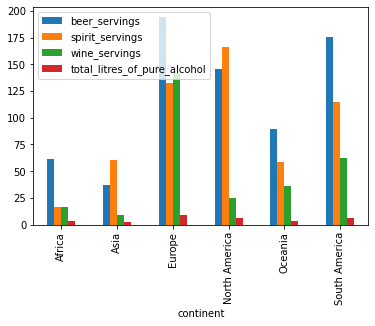

In [217]:
drinks.groupby(["continent"]).mean().plot(kind = "bar")

# DATA SCHOOL LESSONS 13- How do I explore a pandas Series?